In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://www.accuweather.com/en/ng/lagos/4607/daily-weather-forecast/4607'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [3]:
print(soup)

<html><head>
<title>Access Denied</title>
</head><body>
<h1>Access Denied</h1>
 
You don't have permission to access "http://www.accuweather.com/en/ng/lagos/4607/daily-weather-forecast/4607" on this server.<p>
Reference #18.84ec655f.1745849166.8e550055
</p><p>https://errors.edgesuite.net/18.84ec655f.1745849166.8e550055</p>
</body>
</html>



In [8]:
#The access was denied by the web developers and they are hindering us from scarping the site. So we have to tweak it.

page = requests.get(url, headers = {'user-agent' : 'hassh'} )

page.content

b'\n\n<!DOCTYPE html>\n<html lang="en-us" class="accuweather">\n\n<head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\t<meta charset="utf-8" />\n\t<link rel="canonical" href="https://www.accuweather.com/en/ng/lagos/4607/daily-weather-forecast/4607" />\n\t<title>Lagos, Lagos, Nigeria Daily Weather | AccuWeather</title>\n\t<meta name="Description" content="Know what&#x27;s coming with AccuWeather&#x27;s extended daily forecasts for Lagos, Lagos, Nigeria. Up to 90 days of daily highs, lows, and precipitation chances.">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\t<meta name="referrer" content="origin">\n\t\n\t\n\n\t<meta property="fb:profile_id" content="AccuWeather">\n<meta property="fb:app_id" content="132437483467956">\n<meta property="fb:pages" content="71781612888">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Lagos, Lagos, Nigeria Daily Weather | AccuWeather">\n<meta property="og:descrip

In [9]:
#Now it has worked, let it look like html instead of text.

BeautifulSoup(page.content,'html.parser')

#We put the above in a variable called soup

soup = BeautifulSoup(page.content,'html.parser')

print (soup)


<!DOCTYPE html>

<html class="accuweather" lang="en-us">
<head>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8">
<link href="https://www.accuweather.com/en/ng/lagos/4607/daily-weather-forecast/4607" rel="canonical"/>
<title>Lagos, Lagos, Nigeria Daily Weather | AccuWeather</title>
<meta content="Know what's coming with AccuWeather's extended daily forecasts for Lagos, Lagos, Nigeria. Up to 90 days of daily highs, lows, and precipitation chances." name="Description"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<meta content="origin" name="referrer"/>
<meta content="AccuWeather" property="fb:profile_id"/>
<meta content="132437483467956" property="fb:app_id"/>
<meta content="71781612888" property="fb:pages"/>
<meta content="website" property="og:type"/>
<meta content="Lagos, Lagos, Nigeria Daily Weather | AccuWeather" property="og:title"/>
<meta content="Know what's coming with AccuWeather's extended daily forecasts for La

In [19]:
#Now it looks arrange in html format, let us now prettify it so it looks better.

print (soup.prettify())

#Now it looks better.

<!DOCTYPE html>
<html class="accuweather" lang="en-us">
 <head>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8">
   <link href="https://www.accuweather.com/en/ng/lagos/4607/daily-weather-forecast/4607" rel="canonical"/>
   <title>
    Lagos, Lagos, Nigeria Daily Weather | AccuWeather
   </title>
   <meta content="Know what's coming with AccuWeather's extended daily forecasts for Lagos, Lagos, Nigeria. Up to 90 days of daily highs, lows, and precipitation chances." name="Description"/>
   <meta content="width=device-width, initial-scale=1.0" name="viewport">
    <meta content="origin" name="referrer"/>
    <meta content="AccuWeather" property="fb:profile_id"/>
    <meta content="132437483467956" property="fb:app_id"/>
    <meta content="71781612888" property="fb:pages"/>
    <meta content="website" property="og:type"/>
    <meta content="Lagos, Lagos, Nigeria Daily Weather | AccuWeather" property="og:title"/>
    <meta content="Know what's comin

#DATE

In [12]:
#Now we are trying to get our datapoints or values to work with, let's start with the date then followed by the others and if need be to add some, we will.
#We start with the dates by inspecting the webpage and getting the actual dates for each weather report.

soup.find_all('span', class_= 'module-header sub date')


[<span class="module-header sub date">4/28</span>,
 <span class="module-header sub date">4/29</span>,
 <span class="module-header sub date">4/30</span>,
 <span class="module-header sub date">5/1</span>,
 <span class="module-header sub date">5/2</span>,
 <span class="module-header sub date">5/3</span>,
 <span class="module-header sub date">5/4</span>,
 <span class="module-header sub date">5/5</span>,
 <span class="module-header sub date">5/6</span>,
 <span class="module-header sub date">5/7</span>,
 <span class="module-header sub date">5/8</span>,
 <span class="module-header sub date">5/9</span>,
 <span class="module-header sub date">5/10</span>,
 <span class="module-header sub date">5/11</span>,
 <span class="module-header sub date">5/12</span>,
 <span class="module-header sub date">5/13</span>,
 <span class="module-header sub date">5/14</span>,
 <span class="module-header sub date">5/15</span>,
 <span class="module-header sub date">5/16</span>,
 <span class="module-header sub date">5/

In [13]:
#Now let's save this in a variable called date_elements

#date_elements = soup.find_all('span', class_='module-header sub date')

# Now we want to get the actual value of the dates in the whole text
#for element in date_elements:
 #   print(element.text)  # This will print the text of each span

    
    
# Assuming 'date_elements' is populated with the span elements
date_elements = soup.find_all('span', class_='module-header sub date')  # Adjust this line accordingly

# Convert the generator to a list
date = [i.text for i in date_elements]
print(date)  # This will print the list of dates


['4/28', '4/29', '4/30', '5/1', '5/2', '5/3', '5/4', '5/5', '5/6', '5/7', '5/8', '5/9', '5/10', '5/11', '5/12', '5/13', '5/14', '5/15', '5/16', '5/17', '5/18', '5/19', '5/20', '5/21', '5/22', '5/23', '5/24', '5/25', '5/26', '5/27', '5/28', '5/29', '5/30', '5/31', '6/1', '6/2', '6/3', '6/4', '6/5', '6/6', '6/7', '6/8', '6/9', '6/10', '6/11']


HIGH TEMPERATURE

In [31]:
#We are working on High Temperature now

high_temp_elements = soup.find_all('span', class_='high')  # Adjust this line accordingly

# Convert the generator to a list
high_temp = [i.text for i in high_temp_elements]
print(high_temp)  # This will print the list of temperatures


['36°', '32°', '32°', '32°', '30°', '31°', '33°', '32°', '33°', '33°', '32°', '31°', '32°', '30°', '30°', '30°', '31°', '31°', '31°', '30°', '30°', '31°', '30°', '31°', '30°', '31°', '31°', '31°', '31°', '31°', '30°', '30°', '30°', '30°', '30°', '30°', '29°', '30°', '30°', '29°', '29°', '29°', '32°', '31°', '31°']


LOW TEMPERATURE

In [15]:
# Now we work on the low temperature

low_temp_elements = soup.find_all('span', class_='low')  # Adjust this line accordingly

# Convert the generator to a list
low_temp = [i.text for i in low_temp_elements]
print(low_temp)  # This will print the list of low temperatures


['/25°', '/26°', '/26°', '/25°', '/25°', '/26°', '/23°', '/23°', '/23°', '/25°', '/24°', '/24°', '/24°', '/24°', '/25°', '/25°', '/24°', '/25°', '/25°', '/24°', '/24°', '/24°', '/24°', '/24°', '/24°', '/24°', '/24°', '/24°', '/24°', '/24°', '/24°', '/23°', '/24°', '/24°', '/23°', '/23°', '/23°', '/23°', '/24°', '/24°', '/23°', '/24°', '/23°', '/23°', '/23°']


WATERDROP

In [24]:
#Now we work on waterdrop
waterdrop = soup.find_all('div', class_='precip')

# Convert the generator to a list
waterdrop = [i.text for i in waterdrop]
print (waterdrop)


['\n\n\t\t65%\n\t', '\n\n\t\t61%\n\t', '\n\n\t\t60%\n\t', '\n\n\t\t60%\n\t', '\n\n\t\t63%\n\t', '\n\n\t\t61%\n\t', '\n\n\t\t60%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t55%\n\t', '\n\n\t\t60%\n\t', '\n\n\t\t61%\n\t', '\n\n\t\t75%\n\t', '\n\n\t\t68%\n\t', '\n\n\t\t40%\n\t', '\n\n\t\t20%\n\t', '\n\n\t\t25%\n\t', '\n\n\t\t20%\n\t', '\n\n\t\t57%\n\t', '\n\n\t\t63%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t61%\n\t', '\n\n\t\t40%\n\t', '\n\n\t\t61%\n\t', '\n\n\t\t61%\n\t', '\n\n\t\t25%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t40%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t64%\n\t', '\n\n\t\t63%\n\t', '\n\n\t\t57%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t62%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t58%\n\t', '\n\n\t\t57%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t25%\n\t', '\n\n\t\t65%\n\t', '\n\n\t\t40%\n\t']


# DATA CLEANING

In [25]:
#Now it is time to clean our data
#let's import pandas

import pandas as pd
#Now we want to put all values in a dataframe for cleaning effectiveness

df = pd.DataFrame({'date': date, 'high_temp':high_temp, 'low_temp':low_temp,'waterdrop':waterdrop})

print(df)

    date high_temp low_temp        waterdrop
0   4/28       36°     /25°  \n\n\t\t65%\n\t
1   4/29       32°     /26°  \n\n\t\t61%\n\t
2   4/30       32°     /26°  \n\n\t\t60%\n\t
3    5/1       32°     /25°  \n\n\t\t60%\n\t
4    5/2       30°     /25°  \n\n\t\t63%\n\t
5    5/3       31°     /26°  \n\n\t\t61%\n\t
6    5/4       33°     /23°  \n\n\t\t60%\n\t
7    5/5       32°     /23°  \n\n\t\t65%\n\t
8    5/6       33°     /23°  \n\n\t\t55%\n\t
9    5/7       33°     /25°  \n\n\t\t60%\n\t
10   5/8       32°     /24°  \n\n\t\t61%\n\t
11   5/9       31°     /24°  \n\n\t\t75%\n\t
12  5/10       32°     /24°  \n\n\t\t68%\n\t
13  5/11       30°     /24°  \n\n\t\t40%\n\t
14  5/12       30°     /25°  \n\n\t\t20%\n\t
15  5/13       30°     /25°  \n\n\t\t25%\n\t
16  5/14       31°     /24°  \n\n\t\t20%\n\t
17  5/15       31°     /25°  \n\n\t\t57%\n\t
18  5/16       31°     /25°  \n\n\t\t63%\n\t
19  5/17       30°     /24°  \n\n\t\t65%\n\t
20  5/18       30°     /24°  \n\n\t\t65%\n\t
21  5/19  

In [30]:
# I want to set index for clarity
df['index'] = range(1, len(df) + 1)  # Sequential index values
print (df)

         date high_temp low_temp        waterdrop  index
0  2025-04-28       36°     /25°  \n\n\t\t65%\n\t      1
1  2025-04-29       32°     /26°  \n\n\t\t61%\n\t      2
2  2025-04-30       32°     /26°  \n\n\t\t60%\n\t      3
3  2025-05-01       32°     /25°  \n\n\t\t60%\n\t      4
4  2025-05-02       30°     /25°  \n\n\t\t63%\n\t      5
5  2025-05-03       31°     /26°  \n\n\t\t61%\n\t      6
6  2025-05-04       33°     /23°  \n\n\t\t60%\n\t      7
7  2025-05-05       32°     /23°  \n\n\t\t65%\n\t      8
8  2025-05-06       33°     /23°  \n\n\t\t55%\n\t      9
9  2025-05-07       33°     /25°  \n\n\t\t60%\n\t     10
10 2025-05-08       32°     /24°  \n\n\t\t61%\n\t     11
11 2025-05-09       31°     /24°  \n\n\t\t75%\n\t     12
12 2025-05-10       32°     /24°  \n\n\t\t68%\n\t     13
13 2025-05-11       30°     /24°  \n\n\t\t40%\n\t     14
14 2025-05-12       30°     /25°  \n\n\t\t20%\n\t     15
15 2025-05-13       30°     /25°  \n\n\t\t25%\n\t     16
16 2025-05-14       31°     /24

#DATE

In [27]:
#Let's change the date datatype first and add 2025 to the year

pd.to_datetime(df['date']+'/2025')
df['date'] = pd.to_datetime(df['date']+'/2025')
df['date']


0    2025-04-28
1    2025-04-29
2    2025-04-30
3    2025-05-01
4    2025-05-02
5    2025-05-03
6    2025-05-04
7    2025-05-05
8    2025-05-06
9    2025-05-07
10   2025-05-08
11   2025-05-09
12   2025-05-10
13   2025-05-11
14   2025-05-12
15   2025-05-13
16   2025-05-14
17   2025-05-15
18   2025-05-16
19   2025-05-17
20   2025-05-18
21   2025-05-19
22   2025-05-20
23   2025-05-21
24   2025-05-22
25   2025-05-23
26   2025-05-24
27   2025-05-25
28   2025-05-26
29   2025-05-27
30   2025-05-28
31   2025-05-29
32   2025-05-30
33   2025-05-31
34   2025-06-01
35   2025-06-02
36   2025-06-03
37   2025-06-04
38   2025-06-05
39   2025-06-06
40   2025-06-07
41   2025-06-08
42   2025-06-09
43   2025-06-10
44   2025-06-11
Name: date, dtype: datetime64[ns]

HIGH TEMPERATURE

In [28]:
#Now let's clean High Temperature and change the datatype

df['high_temp']

0     36°
1     32°
2     32°
3     32°
4     30°
5     31°
6     33°
7     32°
8     33°
9     33°
10    32°
11    31°
12    32°
13    30°
14    30°
15    30°
16    31°
17    31°
18    31°
19    30°
20    30°
21    31°
22    30°
23    31°
24    30°
25    31°
26    31°
27    31°
28    31°
29    31°
30    30°
31    30°
32    30°
33    30°
34    30°
35    30°
36    29°
37    30°
38    30°
39    29°
40    29°
41    29°
42    32°
43    31°
44    31°
Name: high_temp, dtype: object

In [32]:
# Remove the degree symbol and convert 'high_temp' to numeric

df['high_temp'] = pd.to_numeric(df['high_temp'].str.replace('°',''))


In [33]:
df['high_temp']

0     36
1     32
2     32
3     32
4     30
5     31
6     33
7     32
8     33
9     33
10    32
11    31
12    32
13    30
14    30
15    30
16    31
17    31
18    31
19    30
20    30
21    31
22    30
23    31
24    30
25    31
26    31
27    31
28    31
29    31
30    30
31    30
32    30
33    30
34    30
35    30
36    29
37    30
38    30
39    29
40    29
41    29
42    32
43    31
44    31
Name: high_temp, dtype: int64

LOW TEMPERATURE

In [34]:
df['low_temp']

0     /25°
1     /26°
2     /26°
3     /25°
4     /25°
5     /26°
6     /23°
7     /23°
8     /23°
9     /25°
10    /24°
11    /24°
12    /24°
13    /24°
14    /25°
15    /25°
16    /24°
17    /25°
18    /25°
19    /24°
20    /24°
21    /24°
22    /24°
23    /24°
24    /24°
25    /24°
26    /24°
27    /24°
28    /24°
29    /24°
30    /24°
31    /23°
32    /24°
33    /24°
34    /23°
35    /23°
36    /23°
37    /23°
38    /24°
39    /24°
40    /23°
41    /24°
42    /23°
43    /23°
44    /23°
Name: low_temp, dtype: object

In [35]:
#Now let's clean this and remove the slash and degree symbol, then conver the datatype
pd.to_numeric(df['low_temp'].str.replace('°','').str.replace('/',''))
df['low_temp'] = pd.to_numeric(df['low_temp'].str.replace('°','').str.replace('/',''))

In [169]:
df['low_temp']

0     26
1     26
2     26
3     25
4     25
5     23
6     23
7     23
8     23
9     23
10    24
11    24
12    25
13    25
14    24
15    25
16    25
17    24
18    25
19    25
20    24
21    24
22    24
23    24
24    24
25    24
26    24
27    24
28    24
29    24
30    24
31    24
32    23
33    24
34    24
35    23
36    23
37    23
38    23
39    24
40    24
41    23
42    24
43    23
44    23
Name: low_temp, dtype: int64

WATERDROP

In [36]:
df['waterdrop'] 

0     \n\n\t\t65%\n\t
1     \n\n\t\t61%\n\t
2     \n\n\t\t60%\n\t
3     \n\n\t\t60%\n\t
4     \n\n\t\t63%\n\t
5     \n\n\t\t61%\n\t
6     \n\n\t\t60%\n\t
7     \n\n\t\t65%\n\t
8     \n\n\t\t55%\n\t
9     \n\n\t\t60%\n\t
10    \n\n\t\t61%\n\t
11    \n\n\t\t75%\n\t
12    \n\n\t\t68%\n\t
13    \n\n\t\t40%\n\t
14    \n\n\t\t20%\n\t
15    \n\n\t\t25%\n\t
16    \n\n\t\t20%\n\t
17    \n\n\t\t57%\n\t
18    \n\n\t\t63%\n\t
19    \n\n\t\t65%\n\t
20    \n\n\t\t65%\n\t
21    \n\n\t\t61%\n\t
22    \n\n\t\t40%\n\t
23    \n\n\t\t61%\n\t
24    \n\n\t\t61%\n\t
25    \n\n\t\t25%\n\t
26    \n\n\t\t65%\n\t
27    \n\n\t\t65%\n\t
28    \n\n\t\t40%\n\t
29    \n\n\t\t65%\n\t
30    \n\n\t\t65%\n\t
31    \n\n\t\t64%\n\t
32    \n\n\t\t63%\n\t
33    \n\n\t\t57%\n\t
34    \n\n\t\t65%\n\t
35    \n\n\t\t62%\n\t
36    \n\n\t\t65%\n\t
37    \n\n\t\t58%\n\t
38    \n\n\t\t57%\n\t
39    \n\n\t\t65%\n\t
40    \n\n\t\t65%\n\t
41    \n\n\t\t65%\n\t
42    \n\n\t\t25%\n\t
43    \n\n\t\t65%\n\t
44    \n\n\t\t40%\n\t
Name: wate

In [37]:
# Convert 'waterdrop' to string type
df['waterdrop'] = df['waterdrop'].astype(str)

# Remove unwanted characters
df['waterdrop'] = pd.to_numeric(df['waterdrop'].str.replace('\n\n\t\t','').str.replace('%\n\t',''))
waterdrop = df['waterdrop'] 
df['waterdrop']

0     65
1     61
2     60
3     60
4     63
5     61
6     60
7     65
8     55
9     60
10    61
11    75
12    68
13    40
14    20
15    25
16    20
17    57
18    63
19    65
20    65
21    61
22    40
23    61
24    61
25    25
26    65
27    65
28    40
29    65
30    65
31    64
32    63
33    57
34    65
35    62
36    65
37    58
38    57
39    65
40    65
41    65
42    25
43    65
44    40
Name: waterdrop, dtype: int64

In [38]:
# Convert 'waterdrop' to numeric
df['waterdrop'] = pd.to_numeric(df['waterdrop'], errors='coerce')

# Now we create a variable for Rain to determine if Rain will fall or not and the threshold will be 50.
rain_threshold = 50  

# Create the 'rain' column based on water drop percentage
df['rain'] = df['waterdrop'].apply(lambda x: 'Yes' if x > rain_threshold else 'No')

rain  = df['rain']
# Display the updated DataFrame
print(df)

         date  high_temp  low_temp  waterdrop  index rain
0  2025-04-28         36        25         65      1  Yes
1  2025-04-29         32        26         61      2  Yes
2  2025-04-30         32        26         60      3  Yes
3  2025-05-01         32        25         60      4  Yes
4  2025-05-02         30        25         63      5  Yes
5  2025-05-03         31        26         61      6  Yes
6  2025-05-04         33        23         60      7  Yes
7  2025-05-05         32        23         65      8  Yes
8  2025-05-06         33        23         55      9  Yes
9  2025-05-07         33        25         60     10  Yes
10 2025-05-08         32        24         61     11  Yes
11 2025-05-09         31        24         75     12  Yes
12 2025-05-10         32        24         68     13  Yes
13 2025-05-11         30        24         40     14   No
14 2025-05-12         30        25         20     15   No
15 2025-05-13         30        25         25     16   No
16 2025-05-14 

In [39]:
#So here's how our final output will look like
print(df)

         date  high_temp  low_temp  waterdrop  index rain
0  2025-04-28         36        25         65      1  Yes
1  2025-04-29         32        26         61      2  Yes
2  2025-04-30         32        26         60      3  Yes
3  2025-05-01         32        25         60      4  Yes
4  2025-05-02         30        25         63      5  Yes
5  2025-05-03         31        26         61      6  Yes
6  2025-05-04         33        23         60      7  Yes
7  2025-05-05         32        23         65      8  Yes
8  2025-05-06         33        23         55      9  Yes
9  2025-05-07         33        25         60     10  Yes
10 2025-05-08         32        24         61     11  Yes
11 2025-05-09         31        24         75     12  Yes
12 2025-05-10         32        24         68     13  Yes
13 2025-05-11         30        24         40     14   No
14 2025-05-12         30        25         20     15   No
15 2025-05-13         30        25         25     16   No
16 2025-05-14 

In [43]:
# Drop the 'Index' column now since we don't need it anymore and it is up to 200 datapoints already
df = df.drop(columns=['index'])

In [44]:
# Display the updated DataFrame
print(df)

         date  high_temp  low_temp  waterdrop rain
0  2025-04-28         36        25         65  Yes
1  2025-04-29         32        26         61  Yes
2  2025-04-30         32        26         60  Yes
3  2025-05-01         32        25         60  Yes
4  2025-05-02         30        25         63  Yes
5  2025-05-03         31        26         61  Yes
6  2025-05-04         33        23         60  Yes
7  2025-05-05         32        23         65  Yes
8  2025-05-06         33        23         55  Yes
9  2025-05-07         33        25         60  Yes
10 2025-05-08         32        24         61  Yes
11 2025-05-09         31        24         75  Yes
12 2025-05-10         32        24         68  Yes
13 2025-05-11         30        24         40   No
14 2025-05-12         30        25         20   No
15 2025-05-13         30        25         25   No
16 2025-05-14         31        24         20   No
17 2025-05-15         31        25         57  Yes
18 2025-05-16         31       

In [46]:
df.to_csv('Myweather_report.csv', index=False)

# EDA

In [ ]:
import pandas as pd

#Now we want to find the mean, median and mode for this dataset we have arranged.

In [48]:
# Load the data 
df = pd.read_csv('Myweather_report.csv')

# Calculate the mean for high temp, low temp and waterdrop
print("Mean:")
print(df[['high_temp', 'low_temp', 'waterdrop']].mean())


Mean:
high_temp    30.866667
low_temp     24.044444
waterdrop    56.288889
dtype: float64


In [50]:
# Calculate the median for high temp, low temp and waterdrop

print("\nMedian:")
print(df[['high_temp', 'low_temp', 'waterdrop']].median())


Median:
high_temp    31.0
low_temp     24.0
waterdrop    61.0
dtype: float64


In [51]:
# Calculate the mode for high temp, low temp and waterdrop

print("\nMode:")
print(df[['high_temp', 'low_temp', 'waterdrop']].mode())



Mode:
   high_temp  low_temp  waterdrop
0         30        24         65


# REPORT

In [53]:
#From the EDA, we can see that the temperature has been highest in the past 3 months at 30 degress

#Also the highest water drop we have experienced is 65 which explains why rain has been falling for the past few weeks now.

# DATA VISUALIZATION

In [55]:
#Let's  import matplot library
import matplotlib.pyplot as plt

In [69]:
#I want to create two axis for the water drop and temperatures
plt.figure(figsize= (10,6))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

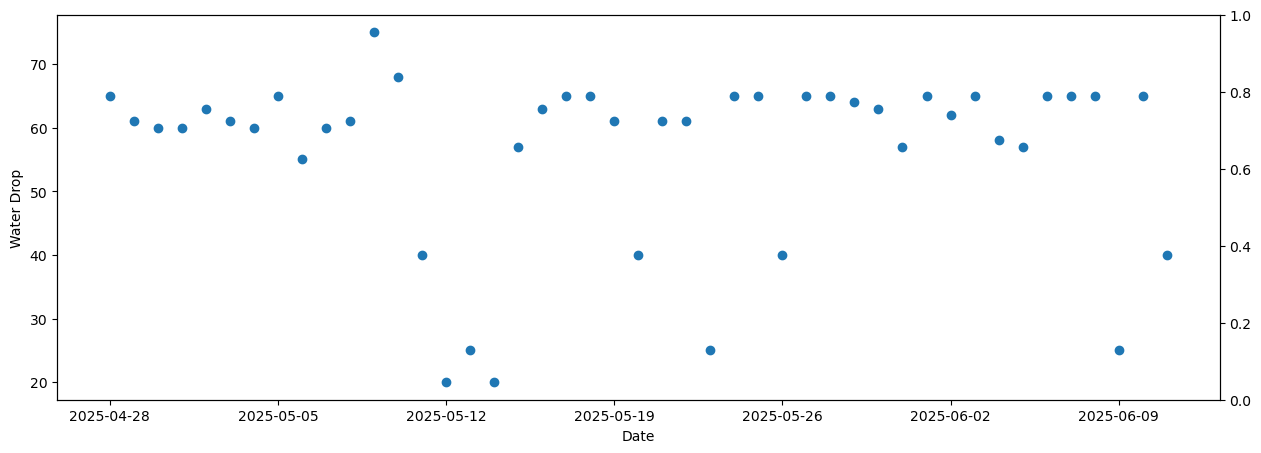

In [83]:
import matplotlib.dates as mdates


#Creating Scatter plot
plt.figure(figsize=(15, 5))
ax1 = plt.subplot()
ax2 = ax1.twinx()

ax1.scatter(df['date'], df['waterdrop'])

ax1.set_xlabel('Date')
ax1.set_ylabel('Water Drop')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis labels
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.xticks(df['date'].iloc[::7])  # Set the x-axis ticks to display every 7 days

plt.show()


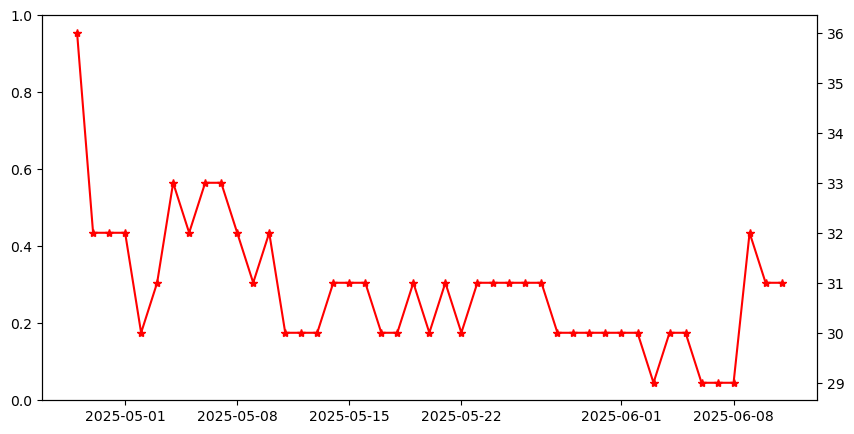

In [86]:

#Now let's plot high temp
import matplotlib.dates as mdates

plt.figure(figsize= (10,5))
ax1=plt.subplot()
ax2=ax1.twinx()
ax2.plot(df['date'],df['high_temp'],color = 'r', marker = '*')



(array([12.,  0.,  0., 22.,  0.,  0.,  8.,  0.,  0.,  3.]),
 array([23. , 23.3, 23.6, 23.9, 24.2, 24.5, 24.8, 25.1, 25.4, 25.7, 26. ]),
 <BarContainer object of 10 artists>)

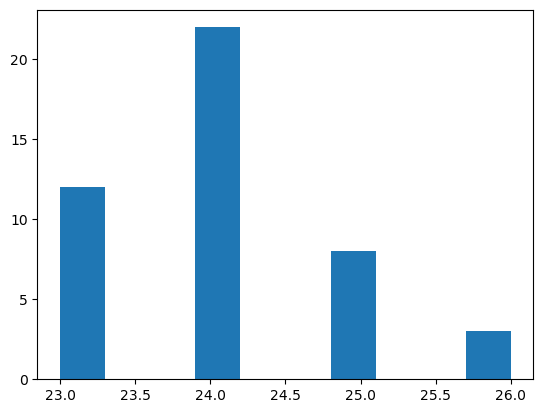

In [98]:
#Now let's plot low temp

import matplotlib.dates as mdates

plt.hist(df['low_temp'])


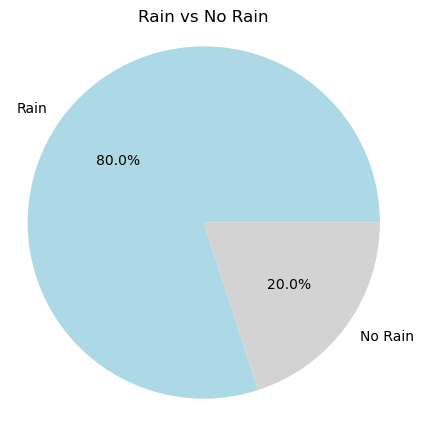

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

#Let us create a new column to indicate if it rained or not
df['has_rain'] = df['rain'].apply(lambda x: 'Yes' if x != 'No' else 'No')

# Calculate the number of days with rain and no rain
num_rain_days = df[df['has_rain'] == 'Yes'].shape[0]
num_no_rain_days = df[df['has_rain'] == 'No'].shape[0]

# Create the pie chart
labels = ['Rain', 'No Rain']
sizes = [num_rain_days, num_no_rain_days]
colors = ['lightblue', 'lightgray']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title(f'Rain vs No Rain')
plt.axis('equal')  
plt.show()


In [96]:
#NOW THIS HAS INDICATED THAT WE HAD MORE RAIN IN THE PAST FEW WEEKS, AS I AM TALKING NOW, RAIN IS ABOUT TO FALL